# Data Import and Cleaning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [2]:
url = \
'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)

In [3]:
np.random.seed(1234)

train, test = train_test_split(penguins, test_size = .2)

In [4]:
def prep_penguins(data):
    """
    Pre-processing function that cleans the Palmer Penguins 
    data set and splits it into the predictor variables X 
    and the target variable y.
    Parameter data is a user-specifed DataFrame.
    Returns a tuple (X, y) where X represents the predictor variables
    and y represents the target variable.
    """
    df = data.copy()

    df["Species"] = df["Species"].str.split().str.get(0)
    
    df = df[["Species", "Island",
             "Culmen Length (mm)", "Culmen Depth (mm)",
             "Flipper Length (mm)", "Body Mass (g)", "Sex",
             "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]
    
    df = df.dropna()
    
    df = df[df["Sex"] != "."]
    
    le = preprocessing.LabelEncoder()
    df["Sex"] = le.fit_transform(df["Sex"])
    df["Island"] = le.fit_transform(df["Island"])
    df["Species"] = le.fit_transform(df["Species"])
    
    X = df.drop(["Species"], axis = 1)
    y = df["Species"]
    
    return(X, y)

X_train, y_train = prep_penguins(train)
X_test,  y_test  = prep_penguins(test)

#  Exploratory Data Analysis

In [5]:
penguins["Species"] = penguins["Species"].str.split().str.get(0)

penguins = penguins[["Species", "Island",
                     "Culmen Length (mm)", "Culmen Depth (mm)",
                     "Flipper Length (mm)", "Body Mass (g)", "Sex",
                     "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]]

penguins = penguins.dropna()

penguins = penguins[penguins["Sex"] != "."]

/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


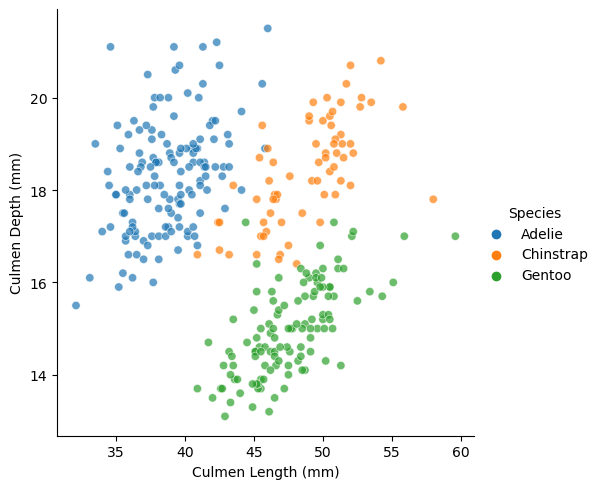

In [6]:
fgrid = sns.relplot(data = penguins,
                    x = "Culmen Length (mm)",
                    y = "Culmen Depth (mm)",
                    hue = "Species",
                    alpha = 0.7)

Culmen Length (mm)
Sex    Species                      
FEMALE Adelie                  37.21
       Chinstrap               46.57
       Gentoo                  45.56
MALE   Adelie                  40.43
       Chinstrap               51.07
       Gentoo                  49.51

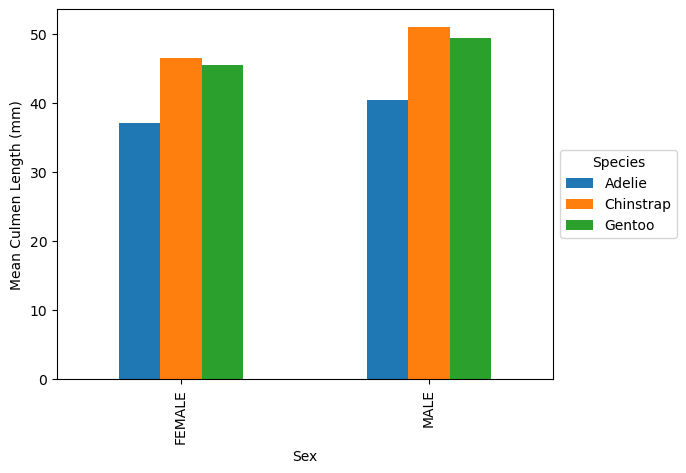

In [7]:
def penguin_summary_table(group_cols, value_cols):
    """
    Creates a table in which the mean of each element of value_cols 
    is shown grouped according to the specified group_cols in the
    Palmer Penguins data set.
    Parameter group_cols is a list of column names in a DataFrame.
    Parameter value_cols is a list of column names in a DataFrame.
    Returns a summary table in which the mean of each element of 
    value_cols is shown grouped according to the specified group_cols
    in the Palmer Penguins data set.
    """
    return penguins.groupby(group_cols)[value_cols].mean().round(2)

penguin_summary_table(["Sex", "Species"], ["Culmen Length (mm)"]).unstack().plot.bar()

plt.legend(loc = "center left", 
           bbox_to_anchor =(1, 0.5), 
           title = "Species", 
           labels = ["Adelie", "Chinstrap", "Gentoo"])

plt.ylabel("Mean Culmen Length (mm)")

penguin_summary_table(["Sex", "Species"], ["Culmen Length (mm)"])

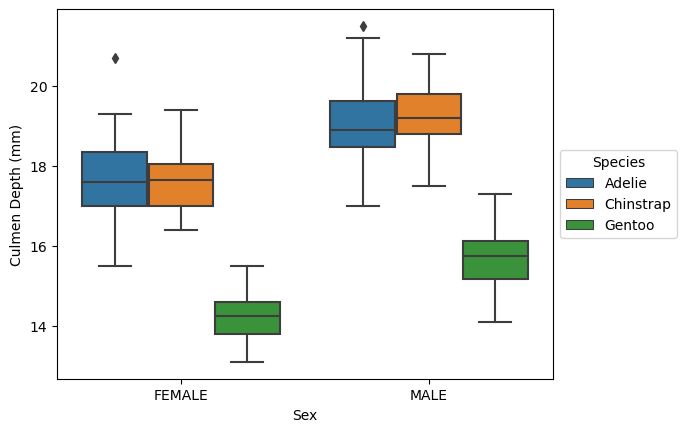

In [8]:
sns.boxplot(data = penguins,
            x = "Sex",
            y = "Culmen Depth (mm)",
            hue = "Species")

plt.legend(loc ='center left', 
           bbox_to_anchor = (1, 0.5),
           title = "Species")

# Feature Selection

In [9]:
def check_column_score(cols):
    """
    Trains and evaluates a logistic regression model via 
    cross-validation on the columns of the data set with
    select indices.
    Parameter cols is a list of column names in a 
    DataFrame.
    Returns the cross-validation score of the model on the 
    columns of the data set with select indices.
    """
    print("Training with columns: " + str(cols))
    LR = LogisticRegression(max_iter = 1000)
    return cross_val_score(LR, X_train[cols], y_train, cv = 5).mean()

In [10]:
combos = [
    ["Island", "Culmen Length (mm)", "Culmen Depth (mm)"],
    ["Island", "Culmen Length (mm)", "Flipper Length (mm)"],
    ["Island", "Culmen Length (mm)", "Body Mass (g)"],
    ["Island", "Culmen Length (mm)", "Delta 15 N (o/oo)"],
    ["Island", "Culmen Length (mm)", "Delta 13 C (o/oo)"],
    ["Island", "Culmen Depth (mm)", "Flipper Length (mm)"],
    ["Island", "Culmen Depth (mm)", "Body Mass (g)"],
    ["Island", "Culmen Depth (mm)", "Delta 15 N (o/oo)"],
    ["Island", "Culmen Depth (mm)", "Delta 13 C (o/oo)"],
    ["Island", "Flipper Length (mm)", "Body Mass (g)"],
    ["Island", "Flipper Length (mm)", "Delta 15 N (o/oo)"],
    ["Island", "Flipper Length (mm)", "Delta 13 C (o/oo)"],
    ["Island", "Body Mass (g)", "Delta 15 N (o/oo)"],
    ["Island", "Body Mass (g)", "Delta 13 C (o/oo)"],
    ["Island", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"],
    ["Sex", "Culmen Length (mm)", "Culmen Depth (mm)"],
    ["Sex", "Culmen Length (mm)", "Flipper Length (mm)"],
    ["Sex", "Culmen Length (mm)", "Body Mass (g)"],
    ["Sex", "Culmen Length (mm)", "Delta 15 N (o/oo)"],
    ["Sex", "Culmen Length (mm)", "Delta 13 C (o/oo)"],
    ["Sex", "Culmen Depth (mm)", "Flipper Length (mm)"],
    ["Sex", "Culmen Depth (mm)", "Body Mass (g)"],
    ["Sex", "Culmen Depth (mm)", "Delta 15 N (o/oo)"],
    ["Sex", "Culmen Depth (mm)", "Delta 13 C (o/oo)"],
    ["Sex", "Flipper Length (mm)", "Body Mass (g)"],
    ["Sex", "Flipper Length (mm)", "Delta 15 N (o/oo)"],
    ["Sex", "Flipper Length (mm)", "Delta 13 C (o/oo)"],
    ["Sex", "Body Mass (g)", "Delta 15 N (o/oo)"],
    ["Sex", "Body Mass (g)", "Delta 13 C (o/oo)"],
    ["Sex", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]
]

In [11]:
for combo in combos:
    x = check_column_score(combo)
    print("CV score is " + str(np.round(x,3)))

Training with columns: ['Island', 'Culmen Length (mm)', 'Culmen Depth (mm)']
CV score is 0.981
Training with columns: ['Island', 'Culmen Length (mm)', 'Flipper Length (mm)']
CV score is 0.965
Training with columns: ['Island', 'Culmen Length (mm)', 'Body Mass (g)']
CV score is 0.938
Training with columns: ['Island', 'Culmen Length (mm)', 'Delta 15 N (o/oo)']
CV score is 0.969
Training with columns: ['Island', 'Culmen Length (mm)', 'Delta 13 C (o/oo)']
CV score is 0.965
Training with columns: ['Island', 'Culmen Depth (mm)', 'Flipper Length (mm)']
CV score is 0.837
Training with columns: ['Island', 'Culmen Depth (mm)', 'Body Mass (g)']
CV score is 0.802
Training with columns: ['Island', 'Culmen Depth (mm)', 'Delta 15 N (o/oo)']
CV score is 0.822
Training with columns: ['Island', 'Culmen Depth (mm)', 'Delta 13 C (o/oo)']
CV score is 0.927
Training with columns: ['Island', 'Flipper Length (mm)', 'Body Mass (g)']
CV score is 0.725
Training with columns: ['Island', 'Flipper Length (mm)', 'Del

# Modeling

In [12]:
cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Sex"]

## Model 1: Logistic Regression

In [13]:
LR = LogisticRegression(max_iter = 1280)

param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

LR_search = GridSearchCV(LR, param_grid, cv = 5)

LR_search.fit(X_train[cols] , y_train)

best_C = LR_search.best_params_["C"]

best_C

10

In [14]:
LR_model = LogisticRegression(max_iter = 1280, C = best_C)
cross_val_score(LR_model, X_train[cols], y_train, cv = 5).mean()

0.9923076923076923

In [15]:
LR_model.fit(X_train[cols], y_train)
LR_model.score(X_test[cols], y_test)

0.9696969696969697

In [16]:
LR_model_y_test_pred = LR_model.predict(X_test[cols])
LR_model_y_test_pred

array([0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2])

In [17]:
matrix = confusion_matrix(y_test, LR_model_y_test_pred)
matrix

array([[29,  1,  0],
       [ 1, 15,  0],
       [ 0,  0, 20]])

In [18]:
def plot_confusion_matrix(matrix, c):
    """
    Displays the results of a model in the form of a confusion 
    matrix on a heat map.
    Parameter matrix is an array representing the matrix to be
    visualized.
    Parameter c is a string representing the name of the machine 
    learning model the confusion matrix was created from.
    Returns None, or nothing, as plot_confusion_matrix(matrix, c)
    is a void function.
    """
    plt.figure(figsize = (10,7))
    sns.set(font_scale = 1.4)
    
    sns.heatmap(data = matrix,
                annot = True, 
                cmap = "YlGnBu", 
                linewidths = 0.2)
    
    class_names = ["Adelie", "Chinstrap","Gentoo"] 
    
    tick_marks = np.arange(len(class_names)) + 0.3
    tick_marks2 = tick_marks + 0.2
    
    plt.xticks(tick_marks2, class_names)
    plt.yticks(tick_marks, class_names)
    
    plt.title("Confusion Matrix for " + c, y = 1.1)
    
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

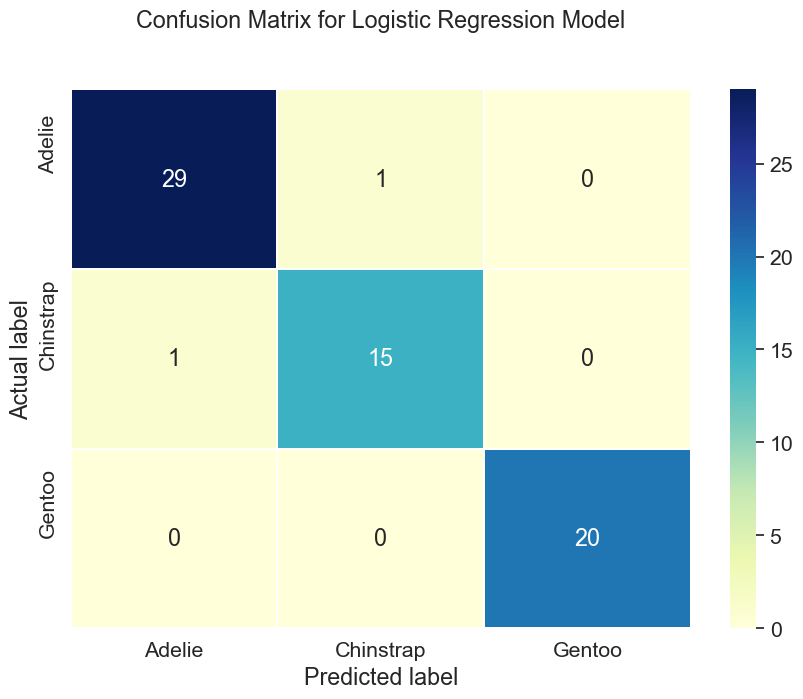

In [19]:
plot_confusion_matrix(matrix, "Logistic Regression Model") 

In [20]:
X, y = prep_penguins(penguins)

X = X[cols]

In [21]:
X

,Culmen Length (mm),Culmen Depth (mm),Sex
1,39.5,17.4,0
2,40.3,18.0,0
4,36.7,19.3,0
5,39.3,20.6,1
6,38.9,17.8,0
...,...,...,...
338,47.2,13.7,0
340,46.8,14.3,0
341,50.4,15.7,1
342,45.2,14.8,0


In [22]:
y

1      0
2      0
4      0
5      0
6      0
      ..
338    2
340    2
341    2
342    2
343    2
Name: Species, Length: 324, dtype: int64

In [23]:
def plot_regions(c, X, y):
    """
    Displays the decision regions of a model against the data.
    Parameter c is a machine learning model.
    Parameter X is the predictor data to be visualized.
    Parameter y is the target data to be visualized.
    Returns None, or nothing, as plot_regions(c, X, y) is 
    a void function.
    """
    sex = {0: "Female", 1: "Male"}
      
    for i in range(0,2):
        mask = X["Sex"] == i
        X0 = X[mask]["Culmen Length (mm)"]
        X1 = X[mask]["Culmen Depth (mm)"]
        y0 = y[mask]

        grid_x = np.linspace(X0.min(), X0.max(), 501)
        grid_y = np.linspace(X1.min(), X1.max(), 501)
        xx, yy = np.meshgrid(grid_x, grid_y)

        XX = xx.ravel()
        YY = yy.ravel()
        ZZ = np.ones(XX.shape) * i

        p = c.predict(np.c_[XX, YY, ZZ])
        
        p = p.reshape(xx.shape)
        
        fig, ax = plt.subplots(1)
        
        ax.contourf(xx, yy, p, cmap = "jet", alpha=0.2)
        
        ax.scatter(X0, X1, c = y0, cmap = "jet")

        ax.set(xlabel = "Culmen Length (mm)", 
               ylabel = "Culmen Depth (mm)",
               title = sex[i]) 
        
        blue_patch = mpatches.Patch(label = "Adelie", color = "#000080")
        green_patch = mpatches.Patch(label = "Chinstrap", color = "#00FF00")
        red_patch = mpatches.Patch(label = "Gentoo", color = "#800000")
        
        plt.legend(loc = "center left", 
                   bbox_to_anchor = (1, 0.5), 
                   title = "Species", 
                   handles = [blue_patch, green_patch, red_patch])

/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


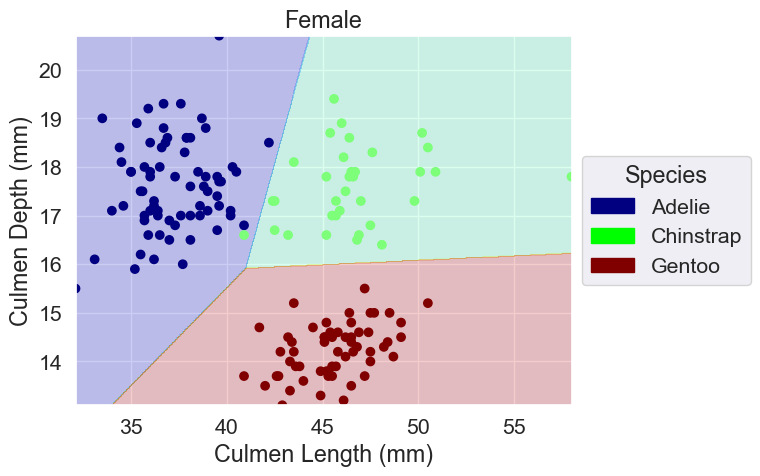

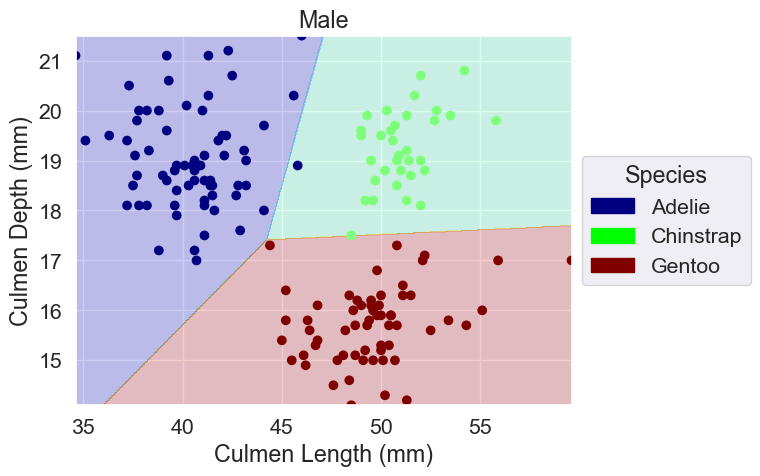

In [24]:
plot_regions(LR_model, X, y) 

## Model 2: Random Forest

In [25]:
np.random.seed(1234)

best_score = -np.inf

for i in range(2,10): 
    for j in range(2,6): 
        
        RF = RandomForestClassifier(n_estimators = i, max_depth = j)
        RF.fit(X_train[cols], y_train)
        
        cv_score = cross_val_score(RF, X_train, y_train,cv = 5).mean()
        
        if cv_score > best_score:
            best_score = cv_score
            best_est = i
            best_depth = j
            
print("Best n_estimators value: " + str(best_est)) 
print("Best max_depth value: " + str(best_depth))
print("Best cross-validation score: " + str(best_score)) 

Best n_estimators value: 7
Best max_depth value: 5
Best cross-validation score: 0.9883107088989442


In [26]:
np.random.seed(1234)

RF_model = RandomForestClassifier(n_estimators = best_est, max_depth = best_depth)

RF_model.fit(X_train[cols], y_train) 

RF_model.score(X_test[cols], y_test)

0.9393939393939394

In [27]:
RF_model_y_test_pred = RF_model.predict(X_test[cols])
RF_model_y_test_pred

array([0, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2])

In [28]:
matrix = confusion_matrix(y_test, RF_model_y_test_pred)
matrix

array([[27,  3,  0],
       [ 1, 15,  0],
       [ 0,  0, 20]])

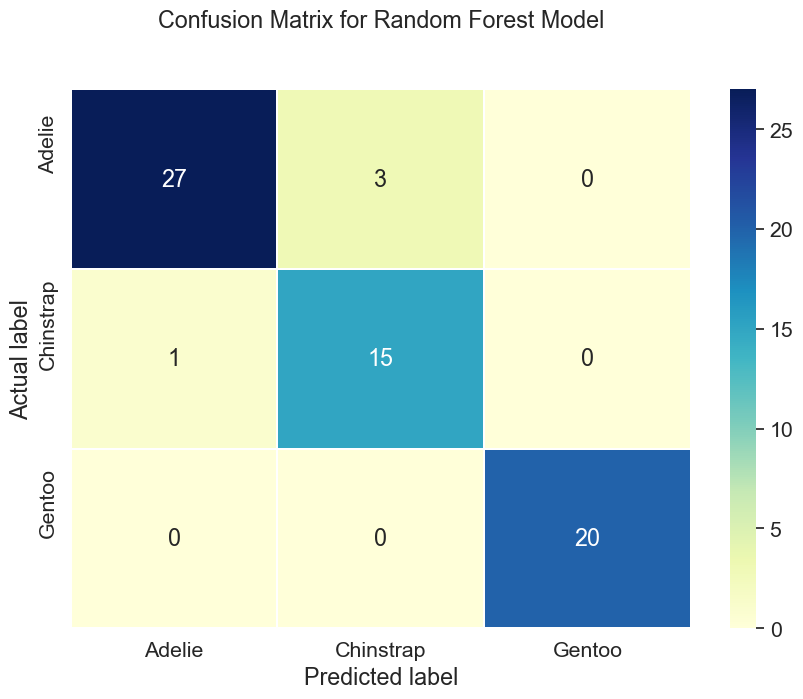

In [29]:
plot_confusion_matrix(matrix, "Random Forest Model") 

/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


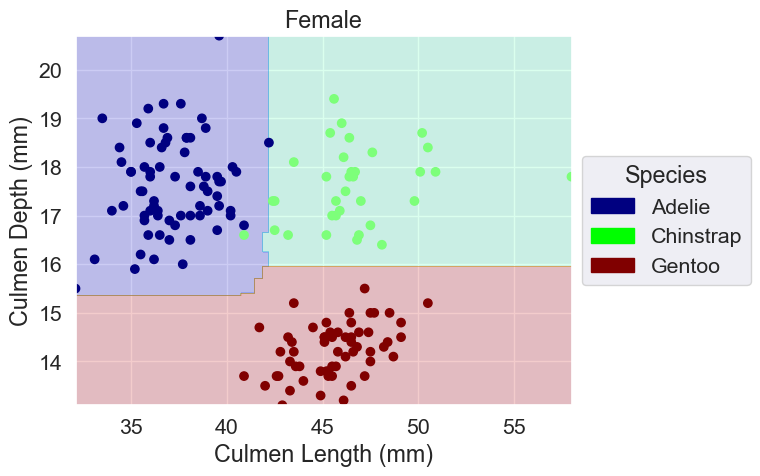

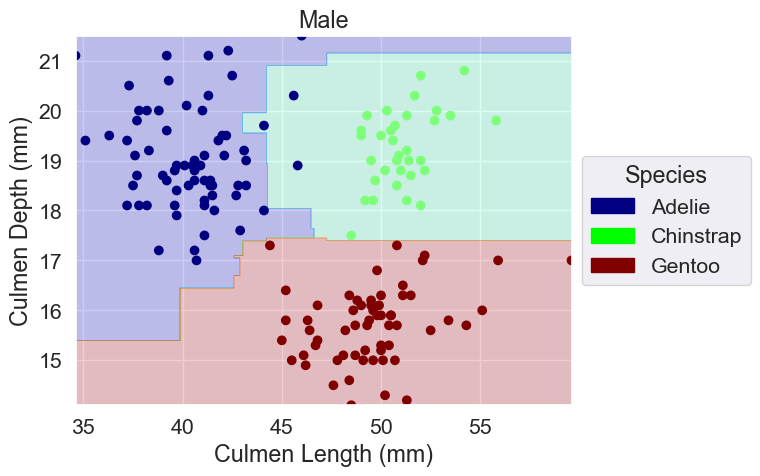

In [30]:
plot_regions(RF_model, X, y)

## Model 3: Support Vector Machine

In [31]:
SVM = svm.SVC()

C_param_grid = {"C": [ 1,10, 50, 100, 150, 200, 250, 1000]}
G_param_grid = {"gamma": [.001,0.01, 0.05, 0.1, .5, 1, 5, 10]}

SVM_C_search = GridSearchCV(SVM, C_param_grid, cv = 5)
SVM_G_search = GridSearchCV(SVM, G_param_grid, cv = 5)

SVM_C_search.fit(X_train[cols] , y_train)
SVM_G_search.fit(X_train[cols] , y_train)

best_C = SVM_C_search.best_params_["C"]
best_G = SVM_G_search.best_params_["gamma"]

In [32]:
SVM_model = svm.SVC(C = best_C, gamma = best_G)
SVM_model.fit(X_train[cols] ,y_train)

SVC(C=250, gamma=0.05)

In [33]:
SVM_model.score(X_test[cols], y_test)

0.9545454545454546

In [34]:
cross_val_score(SVM_model, X_train[cols], y_train, cv = 5).mean()

0.9766968325791856

In [35]:
SVM_model_y_test_pred = SVM_model.predict(X_test[cols])
SVM_model_y_test_pred

array([0, 2, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 2, 2, 0, 1, 2, 1, 2, 0, 2])

In [36]:
matrix = confusion_matrix(y_test, SVM_model_y_test_pred)
matrix

array([[29,  1,  0],
       [ 1, 14,  1],
       [ 0,  0, 20]])

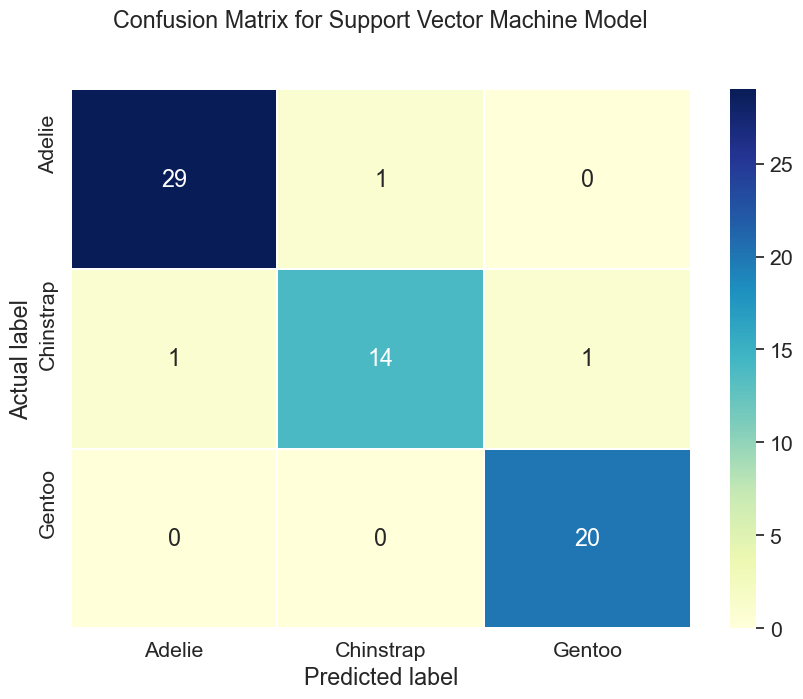

In [37]:
plot_confusion_matrix(matrix, "Support Vector Machine Model")

/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/aidamohasesi/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


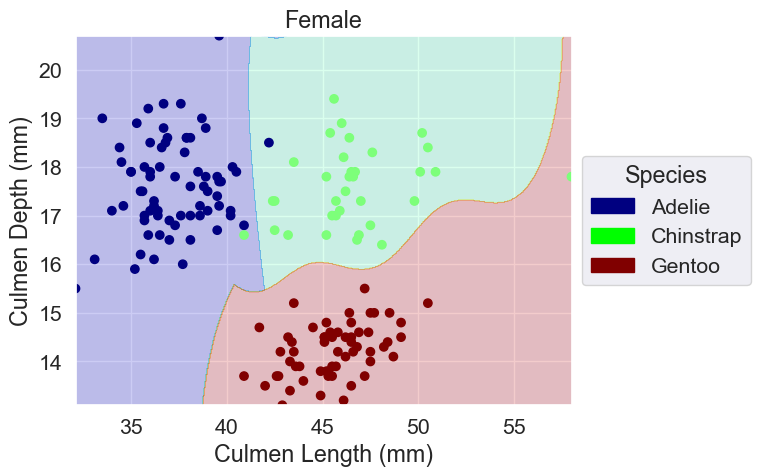

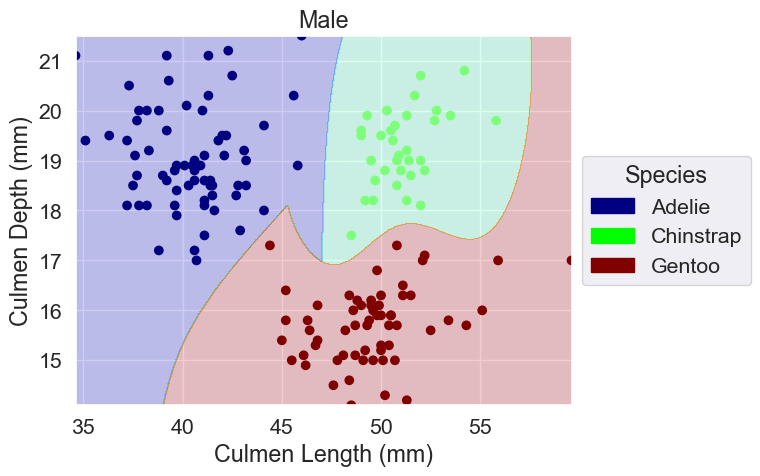

In [38]:
plot_regions(SVM_model, X, y)